In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3 as sql

In [2]:
df=pd.read_csv(r"C:\Users\saran\Desktop\Internship\Task 7\sales_data.csv")

In [3]:
conn=sql.connect("sales_data.db")

In [4]:
df.to_sql("sales",conn, if_exists="replace",index= False)

8

In [5]:
query="""select product,quantity,price from sales"""
result_df=pd.read_sql_query(query,conn)

In [6]:
print(result_df)

  product  quantity  price
0   Apple        10    2.5
1  Banana        15    1.2
2  Orange         8    3.0
3   Apple         5    2.5
4  Banana        12    1.2
5  Orange        10    3.0
6  Grapes         7    4.0
7  Grapes         4    4.0


In [7]:
query1 = """
SELECT product,
       SUM(quantity) AS total_qty,
       SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""
result1_df = pd.read_sql_query(query1, conn)


In [8]:
print(result1_df)

  product  total_qty  revenue
0   Apple         15     37.5
1  Banana         27     32.4
2  Grapes         11     44.0
3  Orange         18     54.0


In [9]:
query2=""" select product, sum(quantity) as total_qty from sales group by product order by total_qty desc"""
result2_df=pd.read_sql_query(query2,conn)

In [10]:
print(result2_df)

  product  total_qty
0  Banana         27
1  Orange         18
2   Apple         15
3  Grapes         11


In [11]:
query3=""" select product, avg(price) as avg_price from sales group by product order by avg_price """
result3_df=pd.read_sql_query(query3,conn)

In [12]:
print(result3_df)

  product  avg_price
0  Banana        1.2
1   Apple        2.5
2  Orange        3.0
3  Grapes        4.0


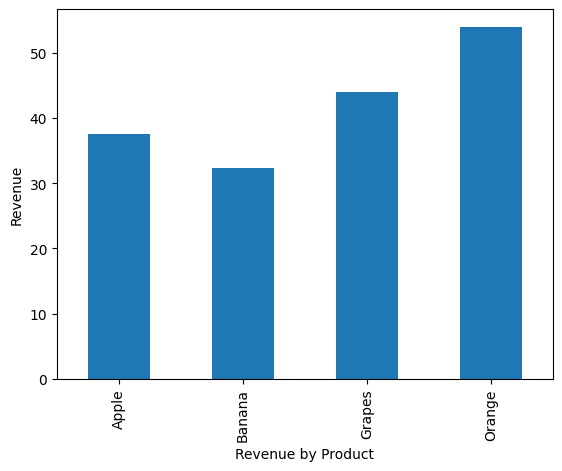

In [13]:
result1_df.plot(kind="bar",x="product",y="revenue",legend=False)
plt.ylabel("Revenue")
plt.xlabel("Revenue by Product")
plt.show()

In [14]:
conn.close()